# # Desafío 3 - Tabaquismo y gestacion

En primer lugar importamos las librerias necesarias

In [84]:
#matplotlib inline
# importamos la triada de Data Science
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# importamos scipy.stats que ayudará a generar distribuciones
import scipy.stats as stats
# archivos con funciones de visualización
#import lec3_graphs as gfx
plt.style.use('seaborn-whitegrid') # Gráficos estilo seaborn
plt.rcParams["figure.figsize"] = (10, 6) # Tamaño gráficos

/var/folders/dr/kts6g9bs2dvbfjwqstxm8p200000gp/T/ipykernel_2274/2535960317.py:10: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid') # Gráficos estilo seaborn


Cargamos el dataframe baby.csv

In [85]:
df_baby = pd.read_csv('baby.csv',delimiter=',')
df_baby.head()

,Unnamed: 0,Birth.Weight,Gestational.Days,Maternal.Age,Maternal.Height,Maternal.Pregnancy.Weight,Maternal.Smoker
0,1,120,284,27,62,100,False
1,2,113,282,33,64,135,False
2,3,128,279,28,64,115,True
3,4,108,282,23,67,125,True
4,5,136,286,25,62,93,False


**1.** Realiza una exploración de los datos, considerando sus tipos y los descriptivos correspondientes.

Usando el comando shape podemos ver que el dataframe tiene 1174 filas y 7 columnas

In [86]:
df_baby.shape

(1174, 7)

Usando el comando info vemos los tipos de datos de cada columna, todos corresponden a integer excepto del campo materna.smoker que es boolean.

In [87]:
df_baby.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1174 entries, 0 to 1173
Data columns (total 7 columns):
 #   Column                     Non-Null Count  Dtype
---  ------                     --------------  -----
 0   Unnamed: 0                 1174 non-null   int64
 1   Birth.Weight               1174 non-null   int64
 2   Gestational.Days           1174 non-null   int64
 3   Maternal.Age               1174 non-null   int64
 4   Maternal.Height            1174 non-null   int64
 5   Maternal.Pregnancy.Weight  1174 non-null   int64
 6   Maternal.Smoker            1174 non-null   bool 
dtypes: bool(1), int64(6)
memory usage: 56.3 KB


Usando el comando describe, vemos las estadisticas generales del dataframe.

In [88]:
df_baby.describe()

,Unnamed: 0,Birth.Weight,Gestational.Days,Maternal.Age,Maternal.Height,Maternal.Pregnancy.Weight
count,1174.000000,1174.000000,1174.000000,1174.000000,1174.000000,1174.000000
mean,587.500000,119.462521,279.101363,27.228279,64.049404,128.478705
std,339.048915,18.328671,16.010305,5.817839,2.526102,20.734282
min,1.000000,55.000000,148.000000,15.000000,53.000000,87.000000
25%,294.250000,108.000000,272.000000,23.000000,62.000000,114.250000
50%,587.500000,120.000000,280.000000,26.000000,64.000000,125.000000
75%,880.750000,131.000000,288.000000,31.000000,66.000000,139.000000
max,1174.000000,176.000000,353.000000,45.000000,72.000000,250.000000


Con las funciones isnull y isna verificamos que no existen valores nulos en el dataframe que puedan afectar nuestros graficos y modelos.

In [89]:
df_baby.isnull().sum()

Unnamed: 0                   0
Birth.Weight                 0
Gestational.Days             0
Maternal.Age                 0
Maternal.Height              0
Maternal.Pregnancy.Weight    0
Maternal.Smoker              0
dtype: int64

In [90]:
df_baby.isna().sum()

Unnamed: 0                   0
Birth.Weight                 0
Gestational.Days             0
Maternal.Age                 0
Maternal.Height              0
Maternal.Pregnancy.Weight    0
Maternal.Smoker              0
dtype: int64

**2.** Considera los pesos de los bebés. ¿Se puede decir que siguen una distribución normal? Justifica tu respuesta creando los gráficos y modelos necesarios.

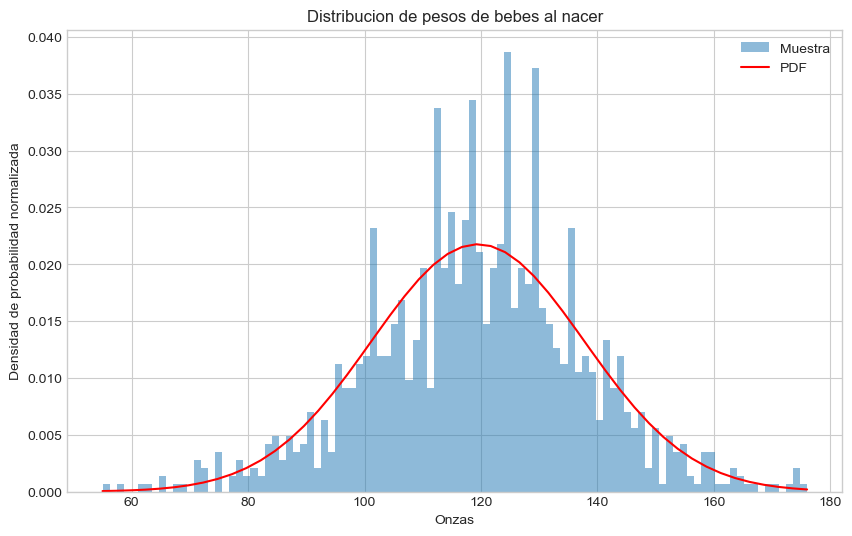

In [91]:
from scipy.stats import norm

peso_bebes = df_baby["Birth.Weight"]

#Calculamos la media y la desviación estándar de los datos, además de los valores máximo y mínimo para graficar.
mu_peso_bebes=peso_bebes.mean()
sigma_peso_bebes=peso_bebes.std()
minimo_peso_bebes=peso_bebes.min()
maximo_peso_bebes=peso_bebes.max()

#Creamos un arreglo de valores equidistantes entre los valores mínimo y máximo, utilizando linspace
x_peso_bebes = np.linspace(minimo_peso_bebes, maximo_peso_bebes)

#Creamos una función, llamada pdf, que calcula el valor de la función de distribución de probabilidad normal, con los parámetros dados
# Notemos que "sigma" funciona como "escala"
pdf_peso_bebes = norm.pdf(x_peso_bebes, loc=mu_peso_bebes, scale=sigma_peso_bebes)


# Construimos un histograma de los datos. El parámetro "density=True" va a construir el histograma haciendo que la suma de todas las áreas de las barras sea igual a 1, para que podamos representar las probabilidades
plt.hist(peso_bebes, bins=100, density=True, alpha=0.5, label='Muestra')#alpha=0.5 da un 50% de transparencia

plt.plot(x_peso_bebes, pdf_peso_bebes, color='red', label='PDF') #Graficamos la distribución normal
plt.xlabel('Onzas')
plt.ylabel('Densidad de probabilidad normalizada')
plt.title('Distribucion de pesos de bebes al nacer')
plt.legend()
plt.show()

Es possible decir que es apreciable una distribución normal tendiendo a la media de 120 onzas como peso del bebe al nacer, la frecuencia de casos de niños al nacer disminuye al disminuir o incrementar el peso al nacer a analizar. Se aprecian tambien valores fuera de rango.

**3.** Considerando lo anterior, verifica el modelo de distribución normal de los pesos para 5 valores diferentes. Compara con los datos reales.

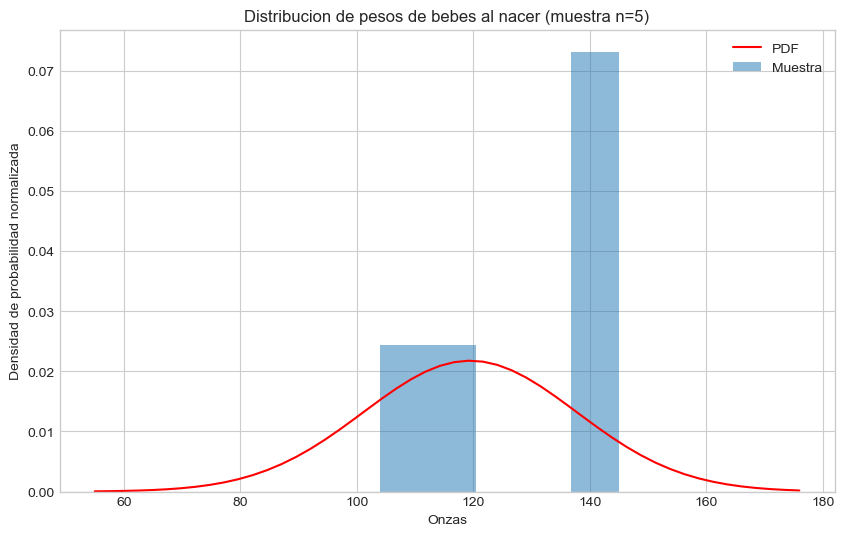

In [92]:
plt.plot(x_peso_bebes, pdf_peso_bebes, color='red', label='PDF') #Graficamos la distribución normal

muestra_peso_bebes1 = peso_bebes.sample(n=5) #Extraemos 5 datos de pesos de bebes al nacer al azar (cada ejecución del código extraerá distintos datos)

#Generamos el histograma con los datos extraidos y agregamos info al grafico
plt.hist(muestra_peso_bebes1, bins=5, density=True, alpha=0.5, label='Muestra')
plt.xlabel('Onzas')
plt.ylabel('Densidad de probabilidad normalizada')
plt.title('Distribucion de pesos de bebes al nacer (muestra n=5)')
plt.legend()
plt.show()

Comparando el modelo de distribucion normal creado previamente con 5 datos de pesos de bebes al nacer extraidos al azar, podemos ver claramente que los datos no se ajustan a la curva, dejando claro que a menor cantidad de datos de la muestra, menos normal es la distribución.

Por otro lado, si aumentamos el tamaño de la muestra, esta tiende a ajustarde cada vez más a la modelo creado.

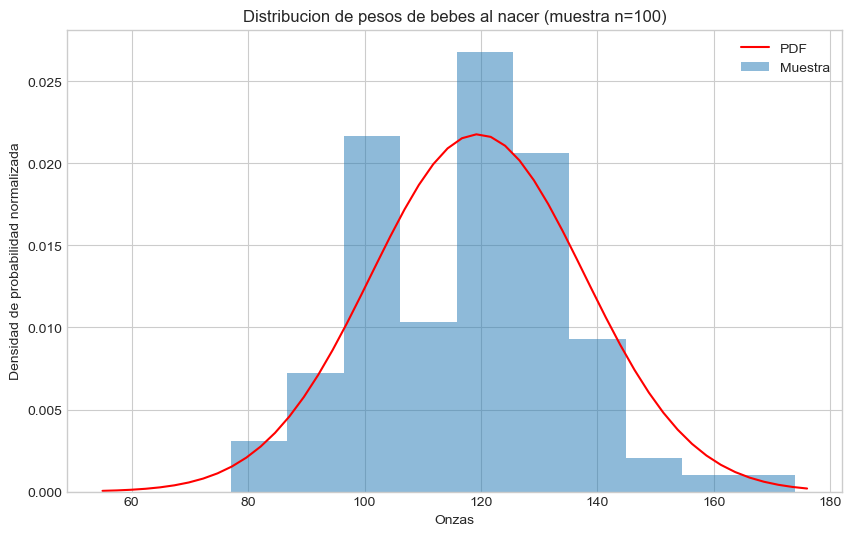

In [93]:
plt.plot(x_peso_bebes, pdf_peso_bebes, color='red', label='PDF') #Graficamos la distribución normal

muestra_peso_bebes2 = peso_bebes.sample(n=100) #Extraemos 5 datos de pesos de bebes al nacer al azar (cada ejecución del código extraerá distintos datos)

#Generamos el histograma con los datos extraidos y agregamos info al grafico
plt.hist(muestra_peso_bebes2, bins=10, density=True, alpha=0.5, label='Muestra')
plt.xlabel('Onzas')
plt.ylabel('Densidad de probabilidad normalizada')
plt.title('Distribucion de pesos de bebes al nacer (muestra n=100)')
plt.legend()
plt.show()

En el siguiente histograma podemos comparar los datos de la muestra de 5 datos con los datos reales, podemos apreciar que la cantidad de 5 datos es muy pequeña para determinar una tendencia y que los valores de la muestra pequeña distan mucho de la tendencia de los datos reales.

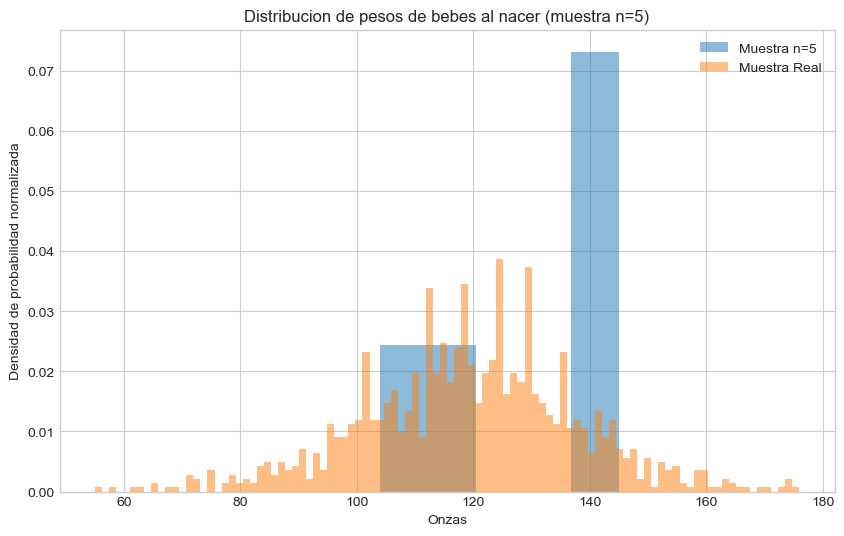

In [94]:
plt.hist(muestra_peso_bebes1, bins=5, density=True, alpha=0.5, label='Muestra n=5')
plt.hist(peso_bebes, bins=100, density=True, alpha=0.5, label='Muestra Real')

plt.xlabel('Onzas')
plt.ylabel('Densidad de probabilidad normalizada')
plt.title('Distribucion de pesos de bebes al nacer (muestra n=5)')
plt.legend()
plt.show()

**4.** Compara los pesos de los bebés de madres fumadoras y no fumadoras. ¿Qué diferencias existen? Explica y construye los modelos correspondientes.

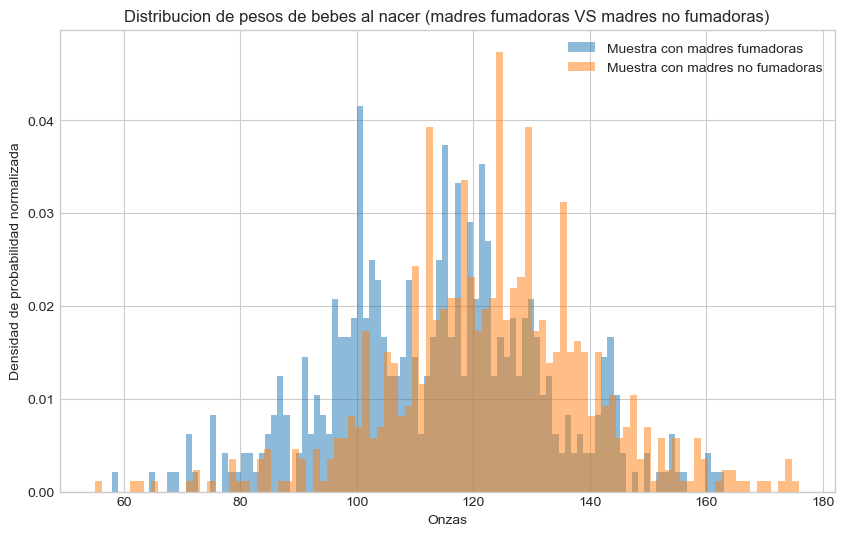

In [95]:
df_fumadoras = df_baby[df_baby['Maternal.Smoker'] == True]
df_no_fumadoras = df_baby[df_baby['Maternal.Smoker'] == False]

plt.hist(df_fumadoras["Birth.Weight"], bins=100, density=True, alpha=0.5, label='Muestra con madres fumadoras')
plt.hist(df_no_fumadoras["Birth.Weight"], bins=100, density=True, alpha=0.5, label='Muestra con madres no fumadoras')

plt.xlabel('Onzas')
plt.ylabel('Densidad de probabilidad normalizada')
plt.title('Distribucion de pesos de bebes al nacer (madres fumadoras VS madres no fumadoras)')
plt.legend()
plt.show()

En esta comparacion de histogramas, es posible apreciar una tendencia donde los pesos de los bebes recien nacidos sin madres fumadoras que el peso de los recien nacidos con madres fumadoras. Generamos los modelos correspondientes para apreciar mejor esta diferencia.

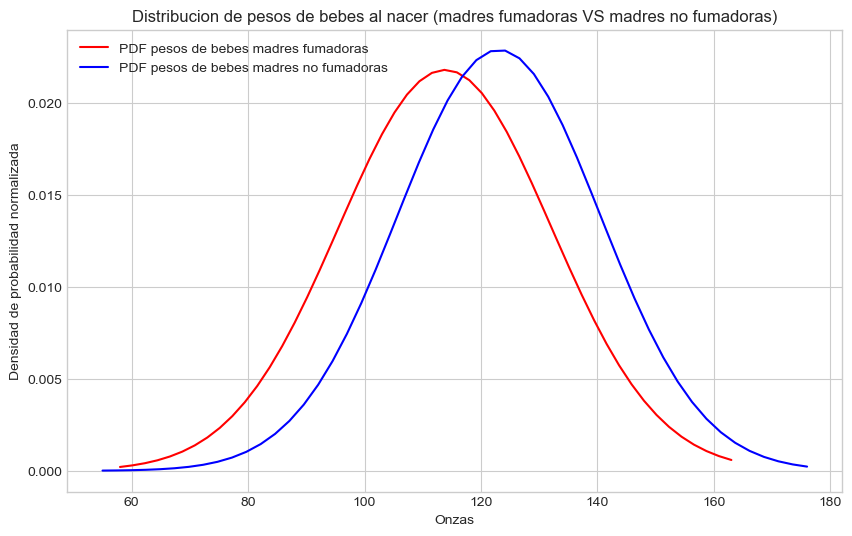

In [96]:
#Calculamos la media y la desviación estándar de los datos, además de los valores máximo y mínimo para graficar.
peso_bebes_fumadora = df_fumadoras["Birth.Weight"]
peso_bebes_no_fumadora = df_no_fumadoras["Birth.Weight"]

mu_fumadora=peso_bebes_fumadora.mean()
sigma_fumadora=peso_bebes_fumadora.std()
minimo_fumadora=peso_bebes_fumadora.min()
maximo_fumadora=peso_bebes_fumadora.max()

mu_no_fumadora=peso_bebes_no_fumadora.mean()
sigma_no_fumadora=peso_bebes_no_fumadora.std()
minimo_no_fumadora=peso_bebes_no_fumadora.min()
maximo_no_fumadora=peso_bebes_no_fumadora.max()

#Creamos un arreglo de valores equidistantes entre los valores mínimo y máximo, utilizando linspace
x_fumadora = np.linspace(minimo_fumadora, maximo_fumadora)
x_no_fumadora = np.linspace(minimo_no_fumadora, maximo_no_fumadora)

#Creamos una función, llamada pdf, que calcula el valor de la función de distribución de probabilidad normal, con los parámetros dados
# Notemos que "sigma" funciona como "escala"
pdf_fumadora = norm.pdf(x_fumadora, loc=mu_fumadora, scale=sigma_fumadora)
pdf_no_fumadora = norm.pdf(x_no_fumadora, loc=mu_no_fumadora, scale=sigma_no_fumadora)

plt.plot(x_fumadora, pdf_fumadora, color='red', label='PDF pesos de bebes madres fumadoras') #Graficamos la distribución normal
plt.plot(x_no_fumadora, pdf_no_fumadora, color='blue', label='PDF pesos de bebes madres no fumadoras') #Graficamos la distribución normal

plt.xlabel('Onzas')
plt.ylabel('Densidad de probabilidad normalizada')
plt.title('Distribucion de pesos de bebes al nacer (madres fumadoras VS madres no fumadoras)')
plt.legend()
plt.show()

Al desarrollar ambos modelos, es mas clara la tendencia a la disminucion del peso de los bebes recien nacidos en madres fumadoras. Para apreciar las diferencia, haremos print de la diferencia de las medias de los modelos:

In [101]:
print("La media del peso de los bebes recian nacidos con madres no fumadoras es: ", mu_no_fumadora, "onzas")
print("La media del peso de los bebes recian nacidos con madres si fumadoras es: ", mu_fumadora, "onzas")
print("Diferencia entre la media de los pesos de los bebes de madres fumadoras y no fumadoras es: ", mu_no_fumadora - mu_fumadora, "onzas")

La media del peso de los bebes recian nacidos con madres no fumadoras es:  123.08531468531469 onzas
La media del peso de los bebes recian nacidos con madres si fumadoras es:  113.81917211328977 onzas
Diferencia entre la media de los pesos de los bebes de madres fumadoras y no fumadoras es:  9.266142572024918 onzas


**5.** Considerando los datos dados:

***5.a.*** Calcula la probabilidad de que una madre escogida al azar fume.

In [110]:
total_muestra = len(df_baby)
cant_fumadoras = len(df_fumadoras)
prob_madre_fumadora = cant_fumadoras / total_muestra
print("La probabilidad de escoger una madre al azar y que esta sea fumadora es de : ", round(prob_madre_fumadora,2))

La probabilidad de escoger una madre al azar y que esta sea fumadora es de :  0.39


***5.b*** A partir del valor anterior, construye un modelo de distribución binomial que
modele el experimento correspondiente a escoger 5 madres al azar y observar
cuántas fuman.